In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from category_encoders.ordinal import OrdinalEncoder

import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay,
                             mean_absolute_error,
                             accuracy_score,
                             recall_score,
                             f1_score,
                             auc,
                             roc_auc_score, roc_curve, log_loss)
from sklearn.neighbors import (KNeighborsClassifier,
                               RadiusNeighborsClassifier)

In [ ]:
col_names = ['Sex', 'Length	', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings']
df = pd.read_csv("abalone.data", names = col_names)
df.isna().sum()

Sex               0
Length\t          0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length	         4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
df_m = df.drop("Sex", axis = 1)

In [ ]:
df_m.head()

,Length\t,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


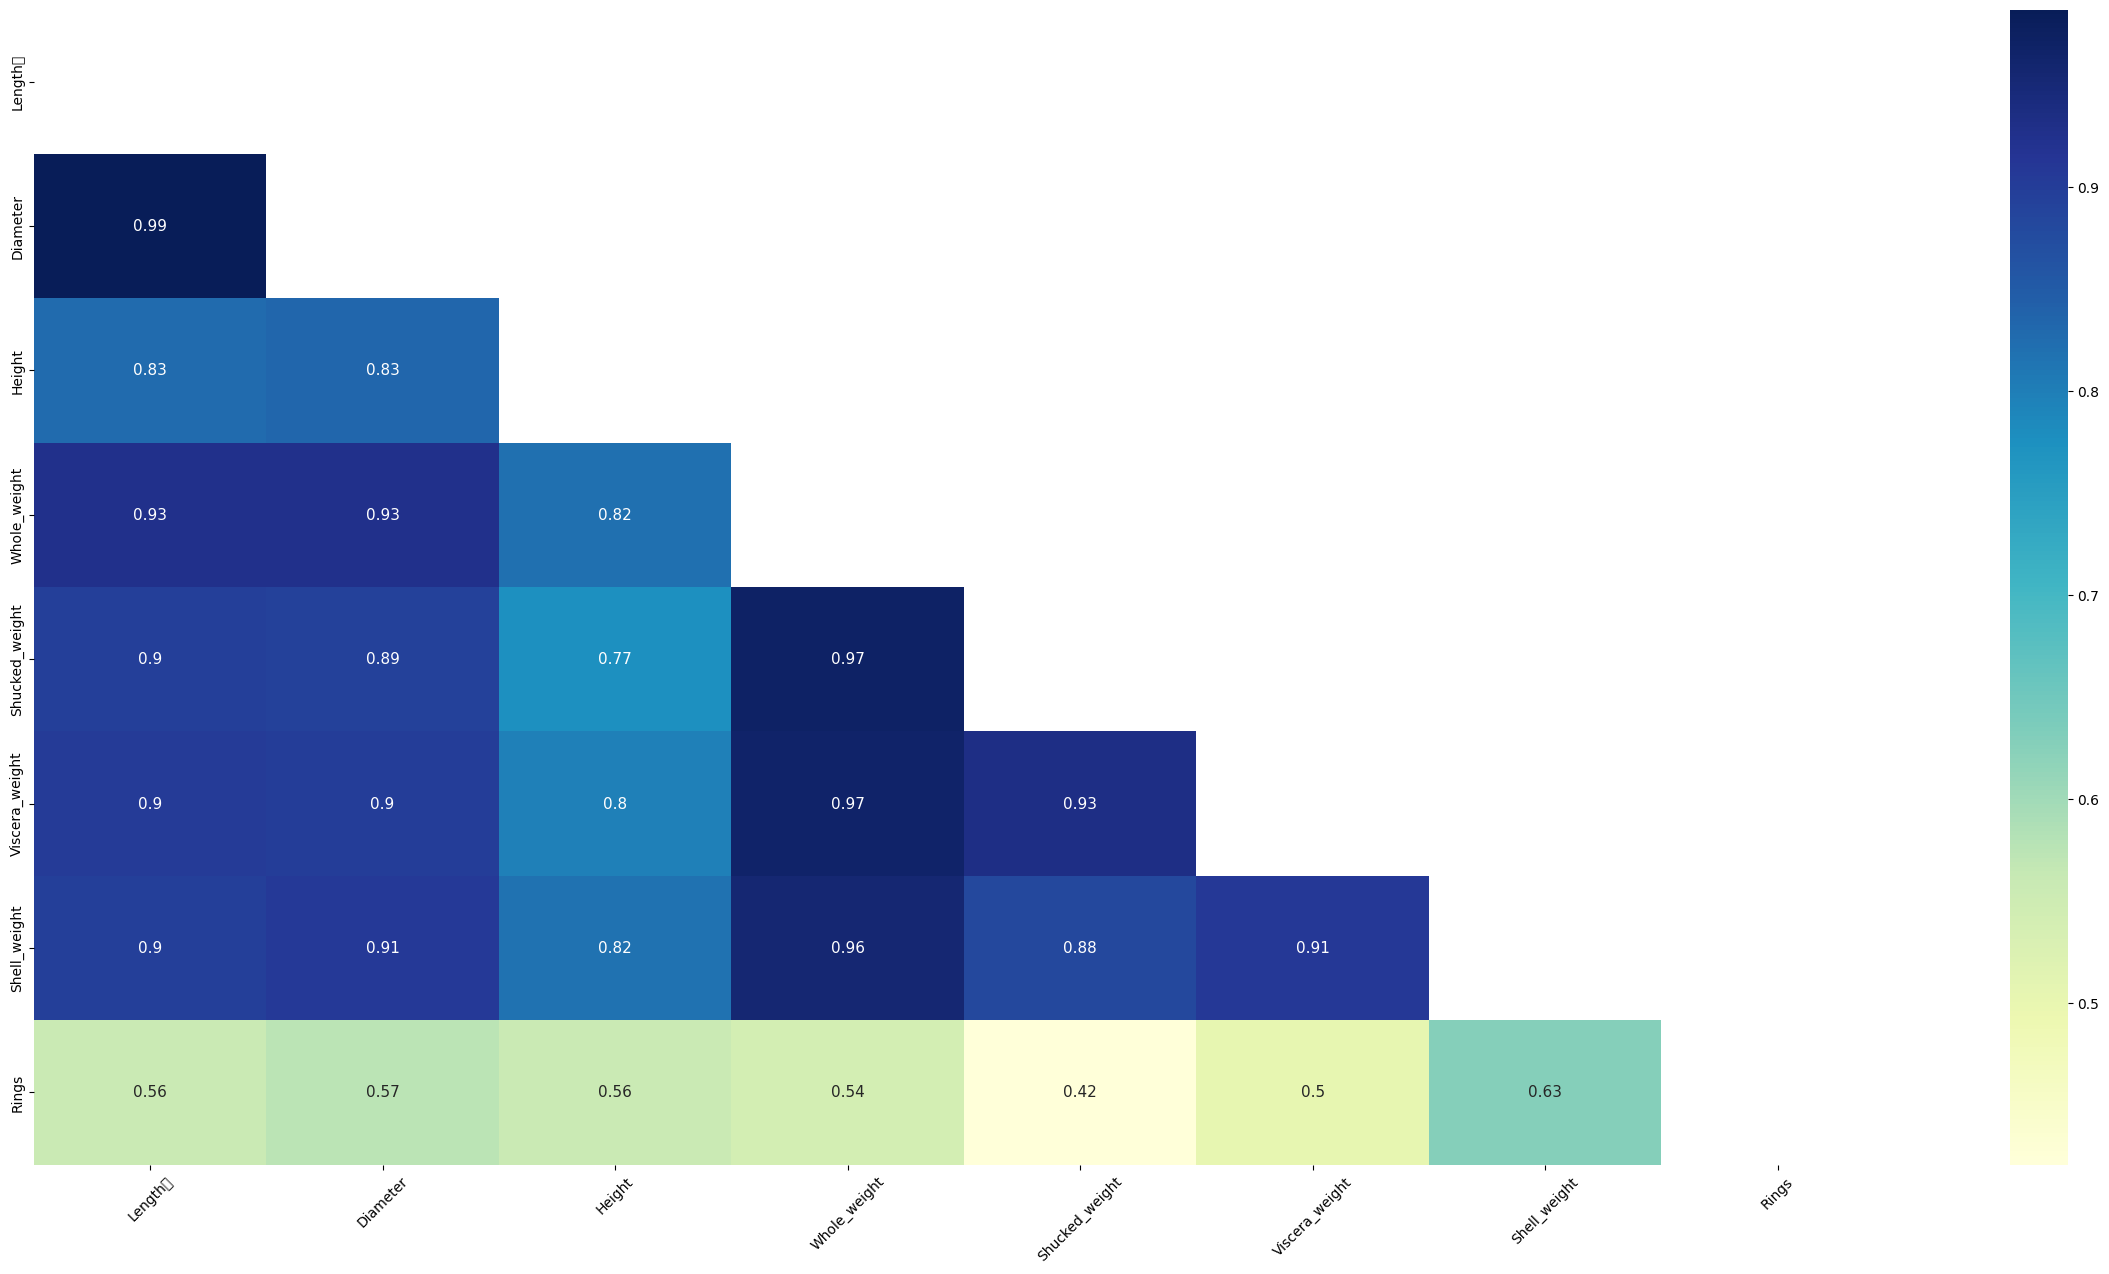

In [ ]:
corr_matrix = df_m.corr()
plt.figure(figsize=(30, 15))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11}, mask=mask)
plt.xticks(rotation=45)
plt.show()

Here we can see that, in general, the dependence of some features on each others is high enough,so there is no sense to remove some of them

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 9 (	) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


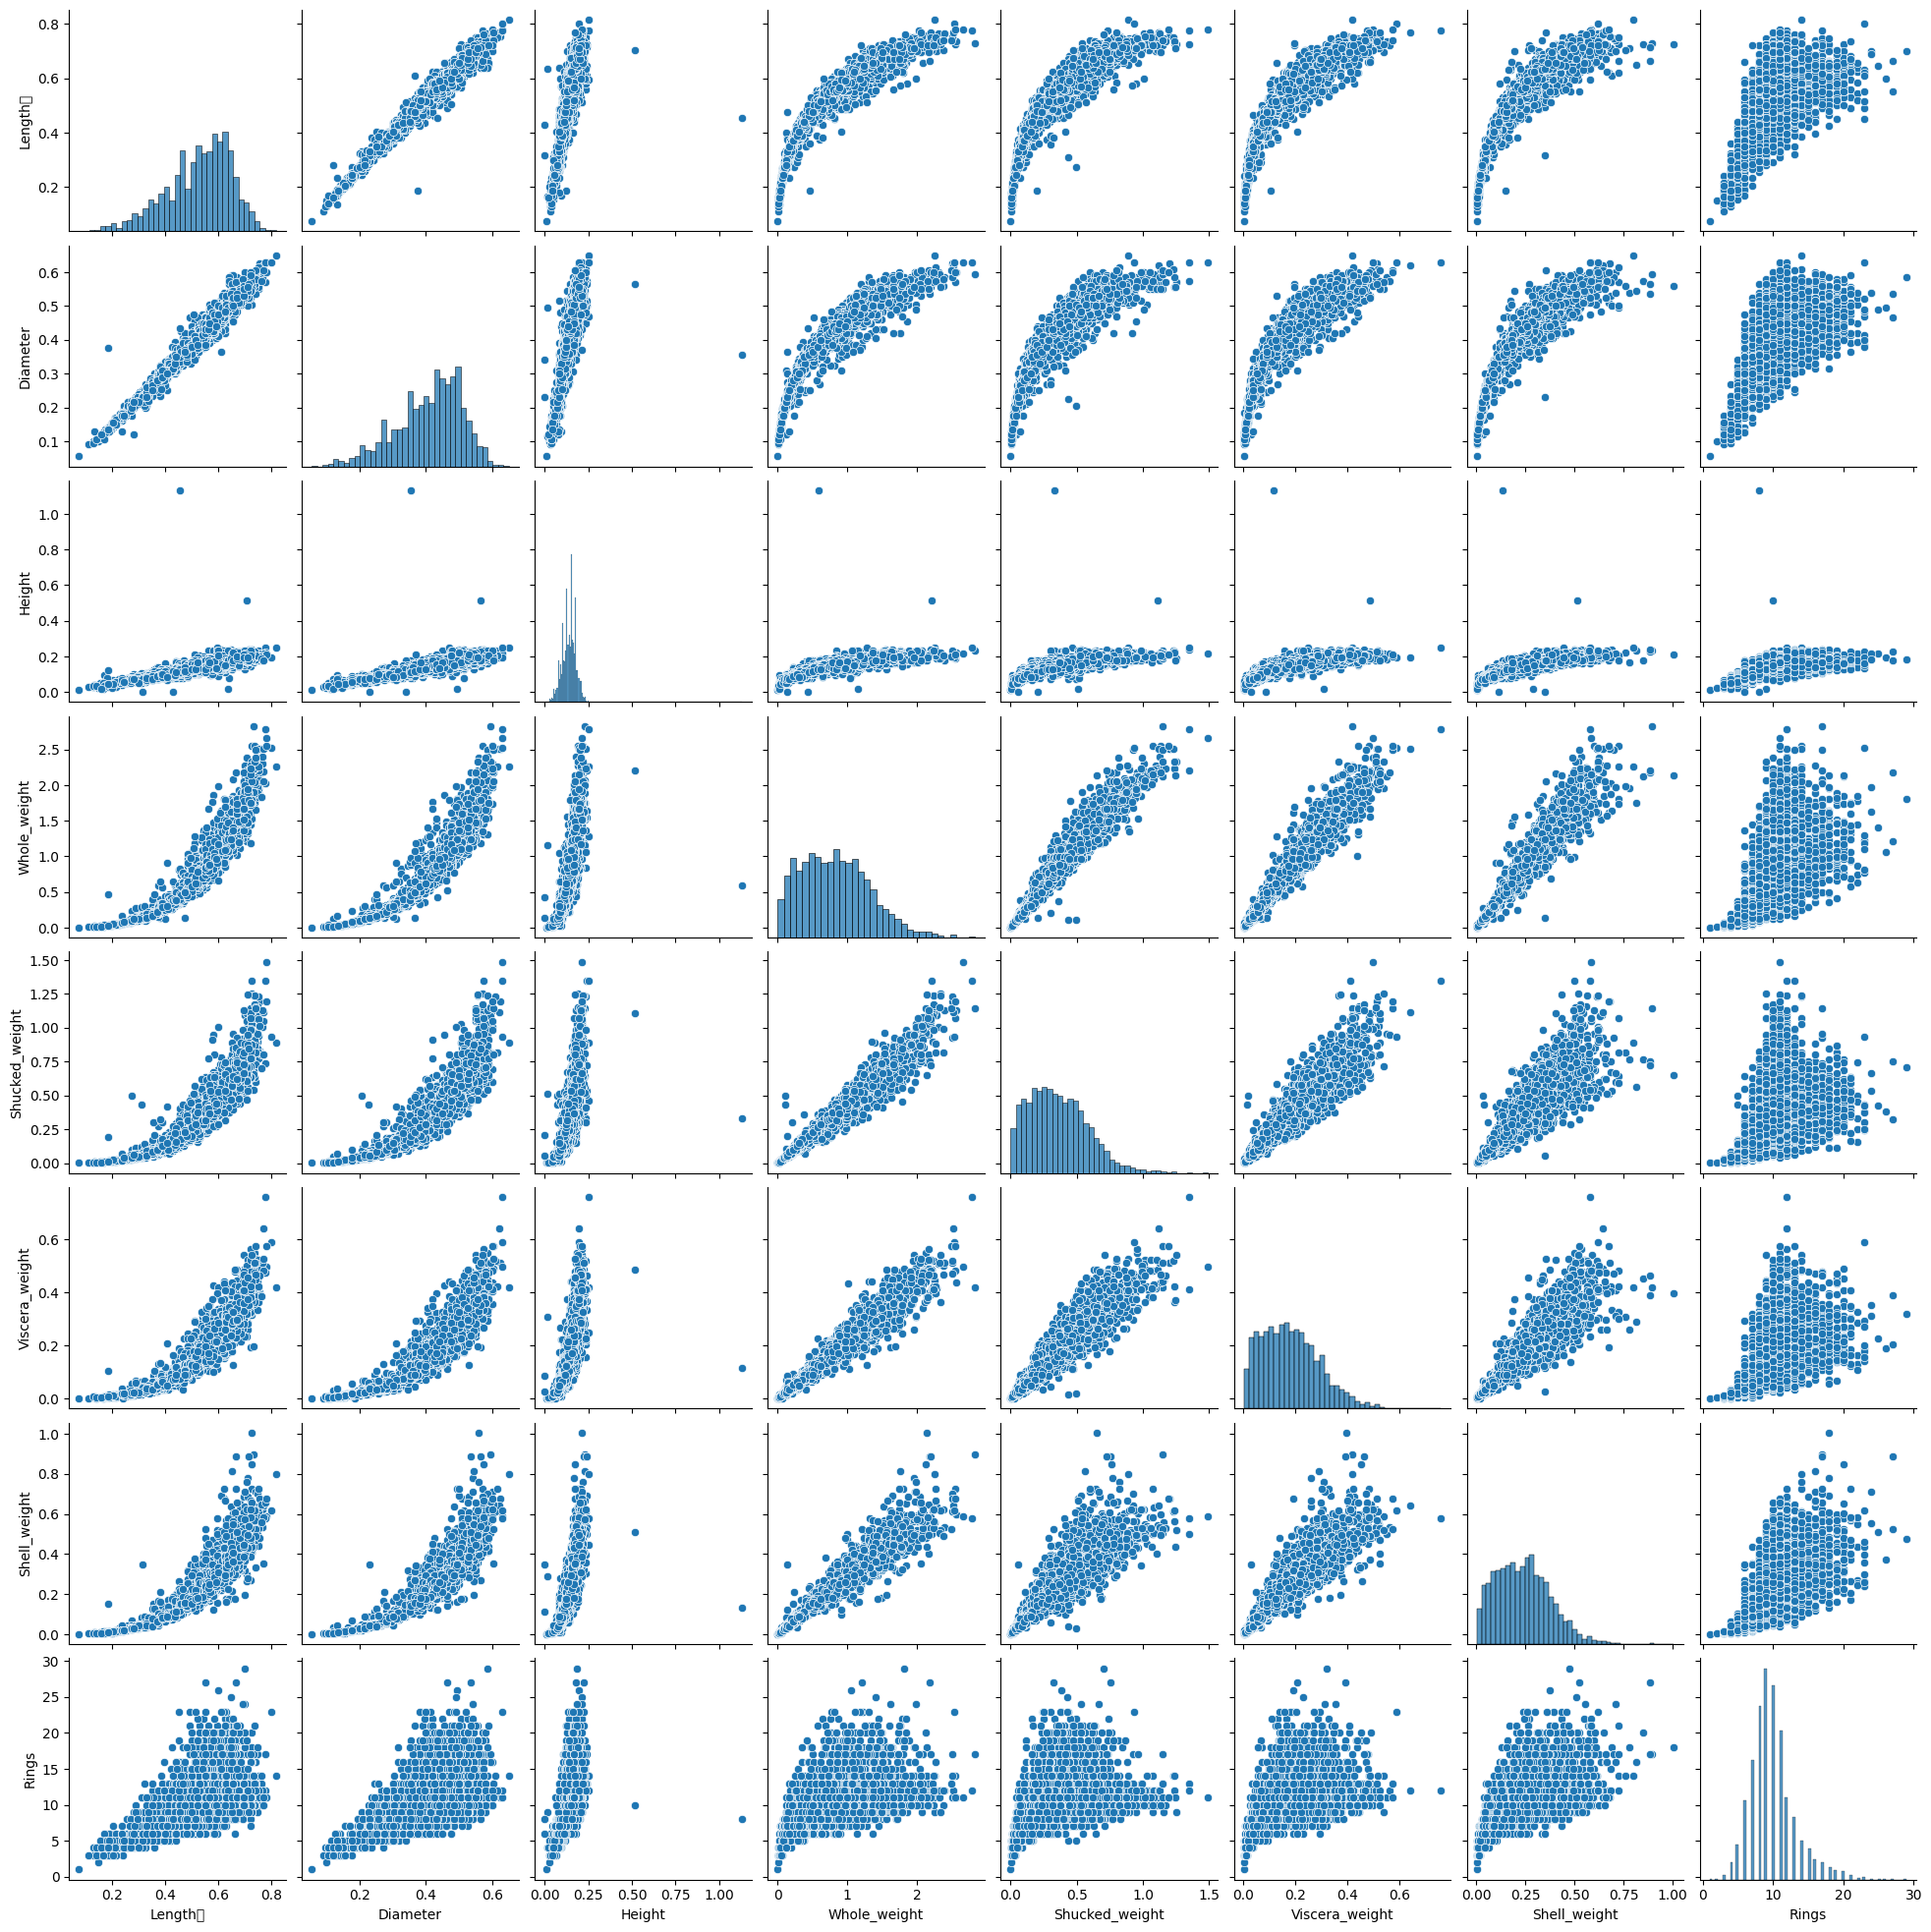

In [ ]:
sns.pairplot(data = df_m)

The distributions is quite asymmetric and there are outliers, so we use RobustScaler here

In [ ]:
counts = df_m['Rings'].value_counts()
counts

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [ ]:
df_Sex = df["Sex"]

In [ ]:
for row in df_m["Rings"]:
  count = df_m[df_m["Rings"] == row].count()["Rings"]
  if(count == 1):
    i = df_m[df_m["Rings"] == row].index
    df_m = df_m.drop(i)
    df_Sex = df_Sex.drop(i)

In [ ]:
df_m['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
Name: Rings, dtype: int64

In [ ]:
X = df_m.loc[:, ~df_m.columns.isin(['Rings'])]
y = df_m.Rings

In [ ]:
X_train_Ids, X_test_Ids = train_test_split(X.index, test_size = .3, random_state = 42, stratify = y)

In [ ]:
scaler = RobustScaler ()
X_train_scaled = scaler.fit_transform(X.loc[X_train_Ids])
X_test_scaled = scaler.transform(X.loc[X_test_Ids])

In [ ]:
reg = LinearRegression()
mse_cv_scores_train = cross_val_score(estimator = reg, X = X_train_scaled, y = y[X_train_Ids], cv = 5, scoring='neg_mean_squared_error')
rmse_cv_scores_train = cross_val_score(estimator = reg, X = X_train_scaled, y = y[X_train_Ids], cv = 5, scoring='neg_root_mean_squared_error')

mse_cv_scores_test = cross_val_score(estimator = reg, X = X_test_scaled, y = y[X_test_Ids], cv = 5, scoring='neg_mean_squared_error')
rmse_cv_scores_test = cross_val_score(estimator = reg, X = X_test_scaled, y = y[X_test_Ids], cv = 5, scoring='neg_root_mean_squared_error')

mae_cv_scores_train = cross_val_score(estimator = reg, X = X_train_scaled, y = y[X_train_Ids], cv = 5, scoring='neg_mean_absolute_error')
mae_cv_scores_test = cross_val_score(estimator = reg, X = X_test_scaled, y = y[X_test_Ids], cv = 5, scoring='neg_mean_absolute_error')



reg.fit(X_train_scaled, y[X_train_Ids])
train_score = reg.score(X_train_scaled, y[X_train_Ids])
test_score = reg.score(X_test_scaled, y[X_test_Ids])

# y_train_pred = reg.predict(X.loc[X_train_Ids])
# y_test_pred = reg.predict(X.loc[X_test_Ids])
# mae_train = mean_absolute_error(y[X_train_Ids], y_train_pred)
# mae_test = mean_absolute_error(y[X_test_Ids], y_test_pred)

print(' MSE CV scores for training set:', -mse_cv_scores_train, '\n',
      'RMSE CV scores for training set:', -rmse_cv_scores_train, '\n',
      ' MSE CV scores for testing set:', -mse_cv_scores_test, '\n',
      'RMSE CV scores for testing set:', -rmse_cv_scores_test, '\n',
      'Train score:', train_score, '\n',
      'Test score:', test_score, '\n',
      'MAE score for training set:', -mae_cv_scores_train, '\n',
      'MAE score for testing set:', -mae_cv_scores_test, '\n'
      )


 MSE CV scores for training set: [4.67866647 4.8879079  4.71837156 4.27471343 4.95055   ] 
 RMSE CV scores for training set: [2.16302253 2.21086135 2.17218129 2.06753801 2.22498315] 
  MSE CV scores for testing set: [5.73219364 4.62171063 4.95303994 6.49959614 5.32878013] 
 RMSE CV scores for testing set: [2.3942     2.14981642 2.22554262 2.54943055 2.30841507] 
 Train score: 0.539333689176672 
 Test score: 0.4776648014906416 
 MAE score for training set: [1.61398741 1.63750034 1.58809035 1.47568607 1.61254534] 
 MAE score for testing set: [1.69807754 1.60781523 1.56338583 1.77717523 1.69503624] 



Now we are going to do classificiation accorfint to Sex, so let's add to our dataframe the new column Sex

In [ ]:
df_c = df_m.copy()
df_c["Sex"] = df_Sex

In [ ]:
df_c.head()

,Length\t,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,M
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,M
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,F
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,M
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,I


In [ ]:
enc = OrdinalEncoder()
df_c["Sex"] = enc.fit_transform(df_c["Sex"])
df_c.head()

,Length\t,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,3


In [ ]:
X_knn = df_c.loc[:, ~df_c.columns.isin(['Sex'])]
y_knn = df_c['Sex']

In [ ]:
X_knn_train_Ids, X_knn_test_Ids = train_test_split(X_knn.index, test_size = .3, random_state = 42, stratify = y_knn)

In [ ]:
scaler = RobustScaler()
X_knn_train_scaled = scaler.fit_transform(X_knn.loc[X_knn_train_Ids])
X_knn_test_scaled = scaler.transform(X_knn.loc[X_knn_test_Ids])

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='cosine')
knn.fit(X_knn_train_scaled, y[X_knn_train_Ids])
y_pred = knn.predict(X_knn_test_scaled)
accuracy = accuracy_score(y[X_knn_test_Ids], y_pred)
precision = precision_score(y[X_knn_test_Ids], y_pred, average='micro')
recall = recall_score(y[X_knn_test_Ids], y_pred, average='micro')
f1 = f1_score(y[X_knn_test_Ids], y_pred, average='micro')

y_probabilities_test = knn.predict_proba(X_knn_test_scaled)
auc_test = roc_auc_score(y[X_knn_test_Ids], y_probabilities_test, multi_class = "ovo")
loss = log_loss(y[X_knn_test_Ids],  y_probabilities_test)


print("Accuracy of knn:", accuracy, '\n',
      "Precision of knn:", precision, '\n',
      "Recall of knn:", recall, '\n',
      "F1 score of knn", f1, '\n',
      "auc score of knn for test set", auc_test, '\n',
      "log loss of knn for test set", loss
      )

Accuracy of knn: 0.6461661341853036 
 Precision of knn: 0.6461661341853036 
 Recall of knn: 0.6461661341853036 
 F1 score of knn 0.6461661341853036 
 auc score of knn for test set 0.7552973468030426 
 log loss of knn for test set 5.72344709547787


In [ ]:
rn = RadiusNeighborsClassifier(radius = 0.2, metric='cosine')
rn.fit(X_knn_train_scaled, y[X_knn_train_Ids])
y_pred = rn.predict(X_knn_test_scaled)
accuracy = accuracy_score(y[X_knn_test_Ids], y_pred)
precision = precision_score(y[X_knn_test_Ids], y_pred, average='micro')
recall = recall_score(y[X_knn_test_Ids], y_pred, average='micro')
f1 = f1_score(y[X_knn_test_Ids], y_pred, average='micro')

y_probabilities_train = rn.predict_proba(X_knn_train_scaled)
auc_train = roc_auc_score(y[X_knn_train_Ids], y_probabilities_train, multi_class = "ovo")
y_probabilities_test = rn.predict_proba(X_knn_test_scaled)
auc_test = roc_auc_score(y[X_knn_test_Ids], y_probabilities_test, multi_class = "ovo")
loss = log_loss(y[X_knn_test_Ids],  y_probabilities_test)


print("Accuracy of rn for test set:", accuracy, '\n',
      "Precision of rn for test set:", precision, '\n',
      "Recall of rn for test set:", recall, '\n',
      "F1 score of rn for test set", f1, '\n',
      "auc score of rn for test set", auc_test, '\n',
      "log loss of knn for test set", loss

      )


Accuracy of rn for test set: 0.29472843450479236 
 Precision of rn for test set: 0.29472843450479236 
 Recall of rn for test set: 0.29472843450479236 
 F1 score of rn for test set 0.29472843450479236 
 auc score of rn for test set 0.7838218110780708 
 log loss of knn for test set 1.783357691345052
